# **PROCESS AND EXPLANATIONS**

In [21]:
# !pip install selenium
# !pip install msedge-selenium-tools
# !pip install bs4
# #READ!!! READ!!! READ!!! ----->>> chech your chrome settings, 'About Chrome' to get your own version and insert mine is '99.0.4844.51'
# !pip install chromedriver_binary==99.0.4844.51  #NOTE: chech your chrome settings, 'About Chrome' to get your own version and insert mine is "99.0.4844.51"

In [1]:
#Now we import the

from selenium import webdriver
import chromedriver_binary
# for MSEdge
from msedge.selenium_tools import Edge, EdgeOptions
import csv
import requests

In [2]:
# Now set them up

#for chrome users
driver = webdriver.Chrome()

For Firefox, microsoftedge

In [3]:
## for Firefox

#driver = webdriver.Firefox()


##for microsoft edge

# options = EdgeOptions()
# options.use_chromium =True
# driver = Edge(options=options)

## reference:

## https://github.com/mozilla/geckodriver/releases/download/v0.28.0/geckodriver-v0.28.0-win64.zip
## https://sites.google.com/a/chromium.org/chromedriver/

## https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/


In [4]:
url= 'https://www.amazon.com/'

In [5]:
driver.get(url)

In [6]:
def my_url(keyword):
    
#     temp = 'https://www.amazon.com/s?k=phone+case&ref=nb_sb_noss_1' #let's get rid of the 'phone+case' and replace it with {} to make the url generic.
      temp = 'https://www.amazon.com/s?k={}&ref=nb_sb_noss_1' # a template url
      keyword = keyword.replace(' ', '+')
      return temp.format(keyword)

In [7]:
url = my_url('Laptop Charger')
url

'https://www.amazon.com/s?k=Laptop+Charger&ref=nb_sb_noss_1'

In [8]:
driver.get(url)

Now let's study the amazon.com a little bit.

We can realise that the page is quite structured, although there are some few records that we need to deal with. What we want to do is to extract data from each record. There are also multiple pages (e.g 1-20 pages can be returned for a single keyword search).

Just like we did earlier on, we need to access the html of the page in order to extract the required data. We will create a Beautiful Soup object for this.

In [9]:
import bs4

soup = bs4.BeautifulSoup(driver.page_source, 'html.parser')

Just like we did earlier on, we can find a tag  that contains the data we want. 
We can right-click on say a title on the search results page to inspect. We found that the **div tag**  with the **data-component-type=s-search-results** contains the data we need.

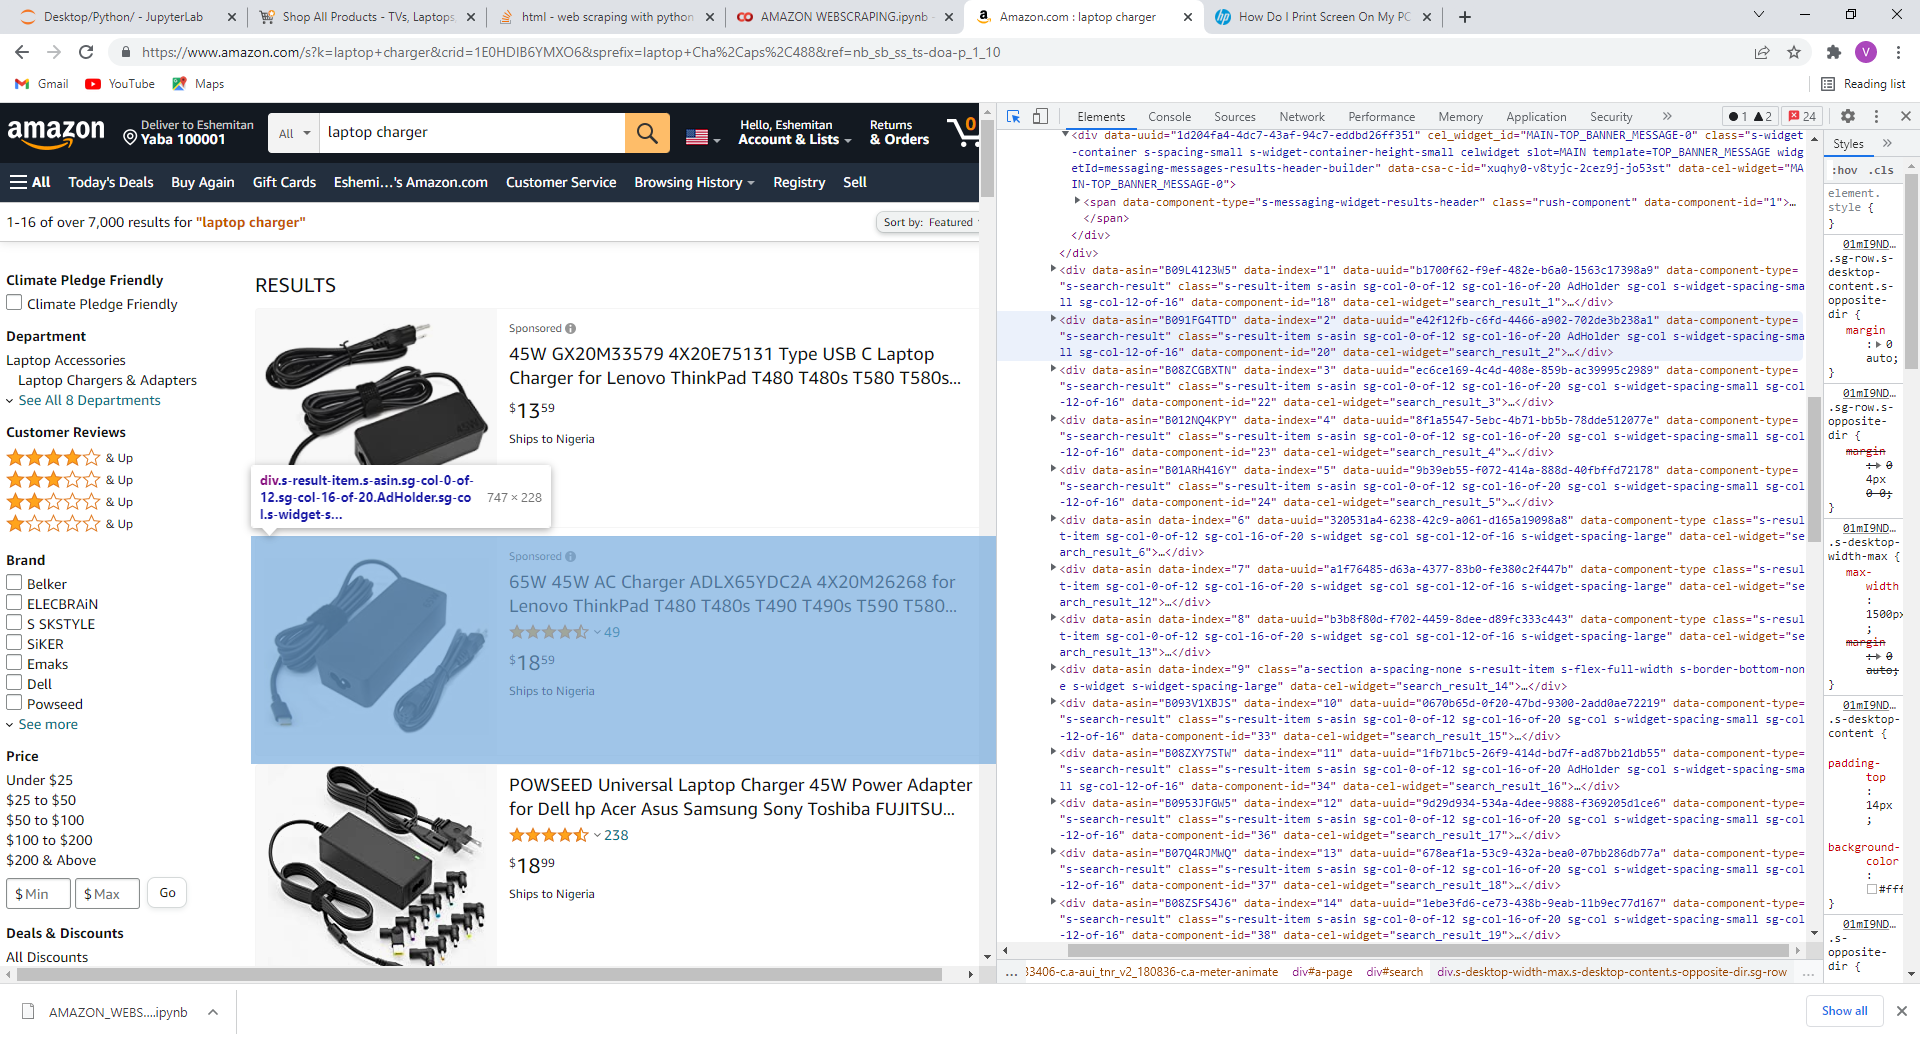

In [10]:
soup_results = soup.findAll('div',{'data-component-type':'s-search-result'})

In [11]:
# soup_results

In [12]:
len(soup_results)

22

We will now create a template which we can based on to make a generic request to extract the data that we need

In [13]:
obj = soup_results[0]

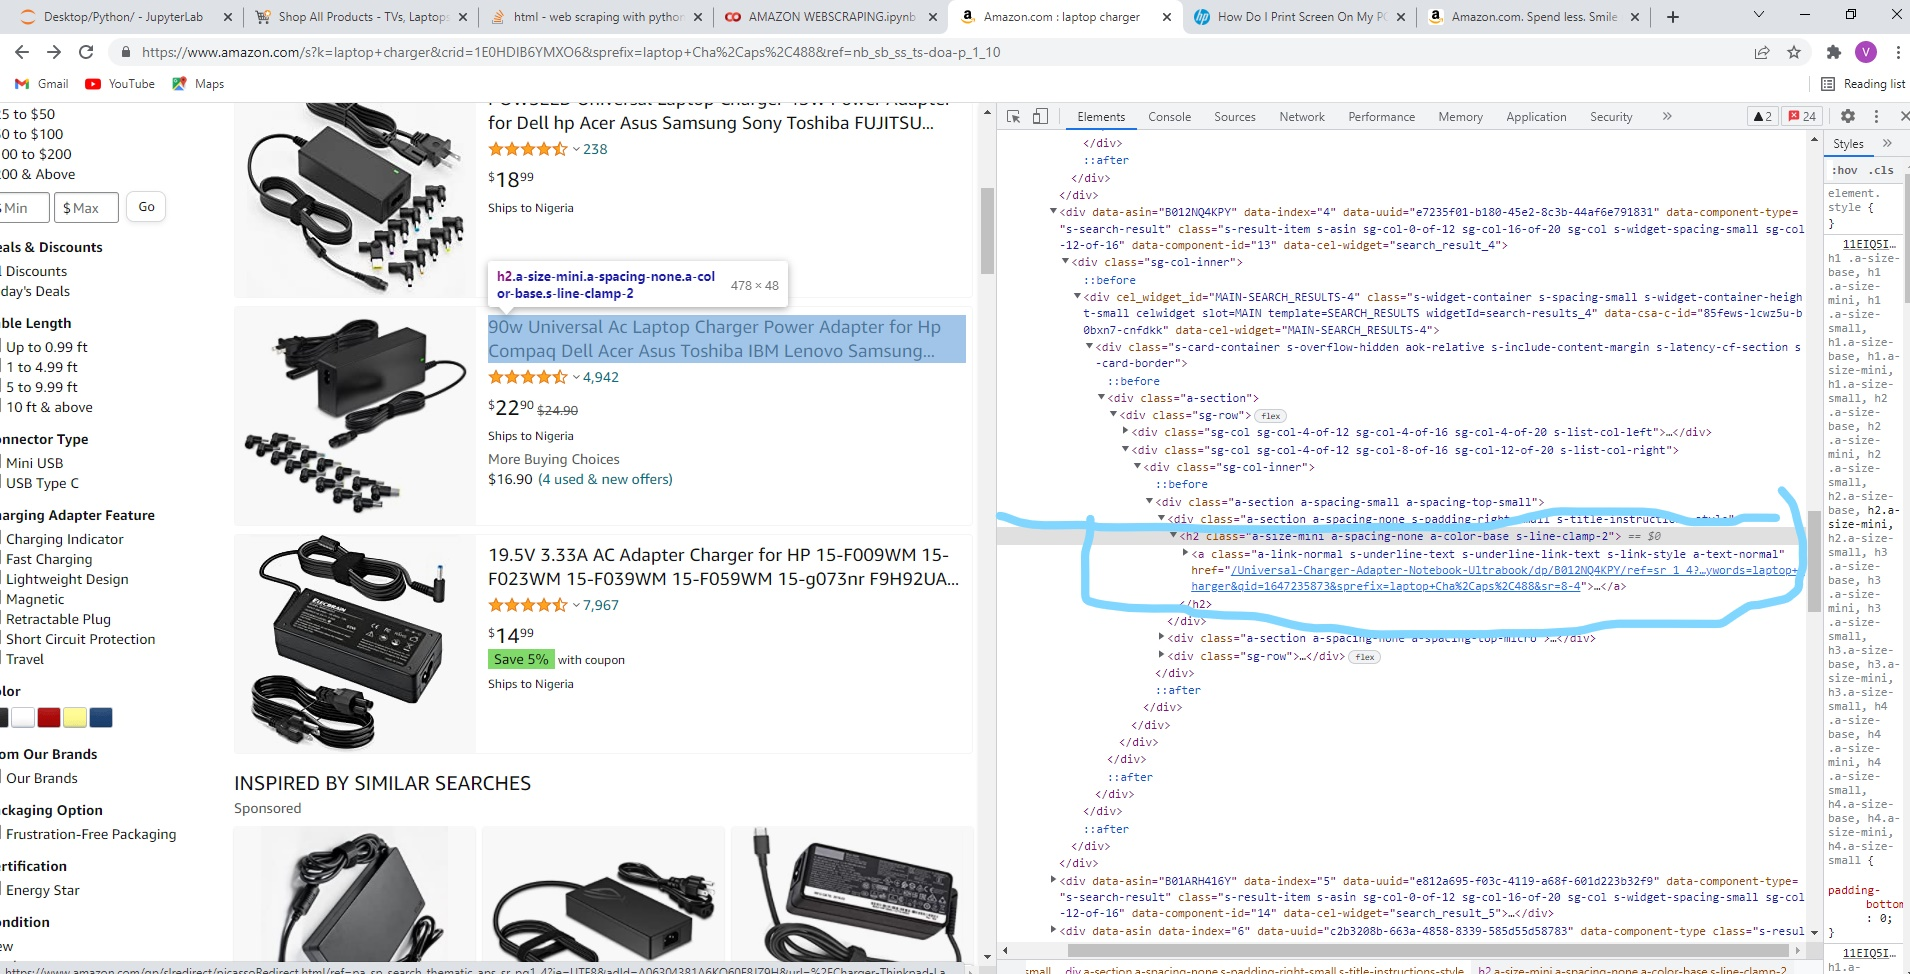

We have noticed that the names are in the h2 tags

In [14]:
atag = obj.h2.a #Creating the h2 tag variable

des = atag.text.strip()
des #we can see below that we have the title correctly scraped

'65W 45W USB C Laptop Charger for Dell Adapter：Chromebook 3100 3400 5190 2-in-1 Latitude 5420 7420 7320 5520 7400 7410 5300 3380 5285 5290 XPS 13 9300 9310 7390 Replacement Type C Power Supply Cord'

In [15]:
# Now let's create a generic url

url = 'https://www.amazon.com/'+atag.get('href')

In [16]:
url

'https://www.amazon.com//gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A020841936OIVVMYZ5LCN&url=%2FLaptop-Charger-Adapter%25EF%25BC%259AChromebook-Latitude-Replacement%2Fdp%2FB09P4NCNH2%2Fref%3Dsr_1_1_sspa%3Fkeywords%3DLaptop%2BCharger%26qid%3D1647337081%26sr%3D8-1-spons%26psc%3D1%26smid%3DA2K7SSYMCPJGY&qualifier=1647337082&id=5630938645030952&widgetName=sp_atf'

## **Get The Price**

In [17]:
#let's get the price same way we searched for the title by looking for the div tag, in this case, we will look for the tag that contains the price of the item.
#we will get this from the 'span' which contains the a-price and then use the 'span' which contains 'a-offscreen' to obtain the actual price.

parent = obj.find('span','a-price')
price = parent.find('span','a-offscreen').text
price

'$16.99'

## **Get The Reviews**

In [18]:
# <i class = 'a_icon-a...
# <span class='a-icon-alt'>4.2 out of 5 stars</span

rate = obj.find('span', 'a-icon-alt').text
rate

'5.0 out of 5 stars'

In [19]:
# Or we could just do

obj.i.text

'5.0 out of 5 stars'

## **Get The Reviews Count**

In [37]:
# For them:
# counts_review=obj.find('span',{'class':'a-size-base','dir':'auto'}).text
# counts_review

In [38]:
counts_review = obj.find('span','a-size-base s-underline-text').text
counts_review

'238'

In [40]:
obj.img.get('src')

'https://m.media-amazon.com/images/I/71VvM5sTOHS._AC_UY218_.jpg'

In [47]:
image = obj.find('img', class_ = 's-image').get('src')
image

'https://m.media-amazon.com/images/I/71VvM5sTOHS._AC_UY218_.jpg'

# **The Amazon Scraper!!**

If you have not installed libraries, uncomment below and run. **NOTE:** for the the chromedriver_binary = {}, check your chrome settings, 'About Chrome' to get your own version and insert mine is 99.0.4844.51

In [ ]:
# # install libraries
# !pip install selenium
# !pip install msedge-selenium-tools
# !pip install bs4
# #READ!!! READ!!! READ!!! ----->>> chech your chrome settings, 'About Chrome' to get your own version and insert mine is '99.0.4844.51'
# !pip install chromedriver_binary==99.0.4844.51  #NOTE: chech your chrome settings, 'About Chrome' to get your own version and insert mine is "99.0.4844.51"

In [1]:
from selenium import webdriver
import bs4
import chromedriver_binary
# for MSEdge
from msedge.selenium_tools import Edge, EdgeOptions
import csv

def my_url(keyword):
    templ = 'https://www.amazon.com/s?k={}'
    keyword = keyword.replace(' ', '+')
    url = templ.format(keyword)
    url += '&page={}'
    return url

def extract_data(obj):
    atag = obj.h2.a
    description = atag.text.strip()
    urls = 'https://www.amazon.com' + atag.get('href')
    
    #it is possible that some items on amazom.com might not be having one of the items we are looking for(e.g. some items might not be having ratings or price), we will be getting error if we dont take care of that. We will therefore add some error handlers
    #if there are no price,probably the item is out of stock or not available, then we will ignore the item, but if there are no reviews yet, it's fine, we will still want to extract the item.
    try:
        parent = obj.find('span','a-price')
        price = parent.find('span','a-offscreen').text
    except AttributeError:
        return
    try:
        #Because rating and review count works together we can put in the same try block
        rate = obj.find('span', 'a-icon-alt').text
        counts_review = obj.find('span','a-size-base s-underline-text').text
        
    except AttributeError:
        #assigning empty string to ratings and review counts
        rate = ''
        counts_review = ''
    
    image = obj.find('img', 's-image').get('src')
    
    #let's create a tuple that will contain all these items and assign it to a result variable
    result = (description, price, rate, counts_review, image, urls)
    return result

def search(keyword, no_of_pages):
    # Startup The Webdriver
    driver = webdriver.Chrome()
    
    records = []
    url = my_url(keyword)
    
    for page in range(1, no_of_pages + 1):
        driver.get(url.format(page))
        soup = bs4.BeautifulSoup(driver.page_source, 'html.parser')
        soup_results = soup.findAll('div',{'data-component-type':'s-search-result'})
        for item in soup_results:
            record = extract_data(item)
            if record:
                records.append(record)
    driver.quit()
    
    with open('Amazon_Results.csv','w', newline = '', encoding = 'utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Description', 'Price', 'Rating', 'Review Count', 'Image Link', 'URL'])
        writer.writerows(records)

In [2]:
def amazon():
    while True:
        try:
            key = input('Enter Exit to terminate!\nSearch: ')
            if key.lower() != 'exit':
                pg = int(input('Enter Number of Pages to scrape.\nPages: '))
                search(key, pg)
            else:
                break
        except(ValueError, TypeError):
            print('Error, You have entered a wrong page input')
    print('Exited')

In [3]:
amazon()

Enter Exit to terminate!
Search:  bag
Enter Number of Pages to scrape.
Pages:  10
Enter Exit to terminate!
Search:  exit


Exited
